# Student Performance Indicator

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/student_info.csv')

Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information


- Gender: Biological gender of students (male/female)
- Race/Ethnicity: Ethenicity of students (Group A/B/C/D/E)
- Parental level of education: Parent's highest level of eduction (bachelor's degree/some college/master's degree/associate's degree/high school)
- Lunch: Lunch eaten before test (standard or free/reduced)
- Test Preparation Course- Course completion status before test(conpleted/none)
- Maths score
- Reading score
- Writing score





## 3. Data Checks

- Missing values
- Duplicates
- Data type
- Number of unique values of each column
- Statistics of data set
- Various categories present in the different categorical column

### 3.1 Missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No null values in the data set

### 3.2 Duplicates

In [10]:
df.duplicated().sum()

0

No duplicated values in the set

### 3.3 Check data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- All means are quite close to each other
- The standard deviations are also pretty close
- The minimum score for maths (0) was much lower than the minimum scores for reading(17) & writing(10)

### 3.7 Exploring Data

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Getting categories

In [29]:
print("Categories in gender variable: ", end="")
print(df["gender"].unique())
print()
print("Categories in race_ethnicity variable: ", end="")
print(df["race_ethnicity"].unique())
print()
print("Categories in parental level of education  variable: ",end="")
print(df["parental_level_of_education"].unique())
print()
print("Categories of lunch variable: ",end="")
print(df["lunch"].unique())
print()
print("Categories of test prep course: ",end="")
print(df["test_preparation_course"].unique())

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education  variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories of lunch variable: ['standard' 'free/reduced']

Categories of test prep course: ['none' 'completed']


Numerical & Categorical columns

In [42]:
numeric= [feature for feature in df.columns if df[feature].dtype =="int64"]
category= [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numerical features: {}".format(len(numeric), numeric))
print("\nWe have {} categorical features: {}".format(len(category), category))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 "Total Score" & "Average" columns

In [43]:
df['total_score']= df['math_score']+ df['reading_score']+df['writing_score']
df['average_score']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [54]:
maths_full= (df['math_score']==100).sum()
writing_full= (df['writing_score']==100).sum()
reading_full= (df['reading_score']==100).sum()

print(f'Number of students who scored full marks in Maths: {maths_full}')
print(f'Number of students who scored full in Writing: {writing_full} ')
print(f'Number of students who scored full marks in Reading: {reading_full}')


Number of students who scored full marks in Maths: 7
Number of students who scored full in Writing: 14 
Number of students who scored full marks in Reading: 17


In [56]:
maths_20= (df['math_score']<=20).sum()
writing_20= (df['writing_score']<=20).sum()
reading_20= (df['reading_score']<=20).sum()

print(f'Number of students who got less than 20 marks in Maths: {maths_20}')
print(f'Number of students who got less tha 20 marks in Writing: {writing_20}')
print(f'Number of students who got less tha 20 marks in Reading: {reading_20}')

Number of students who got less than 20 marks in Maths: 4
Number of students who got less tha 20 marks in Writing: 3
Number of students who got less tha 20 marks in Reading: 1


##### Insights
- Performed the best in Reading
- Performed the worst in Maths

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)
#### 4.1.1 Histogram & KDE

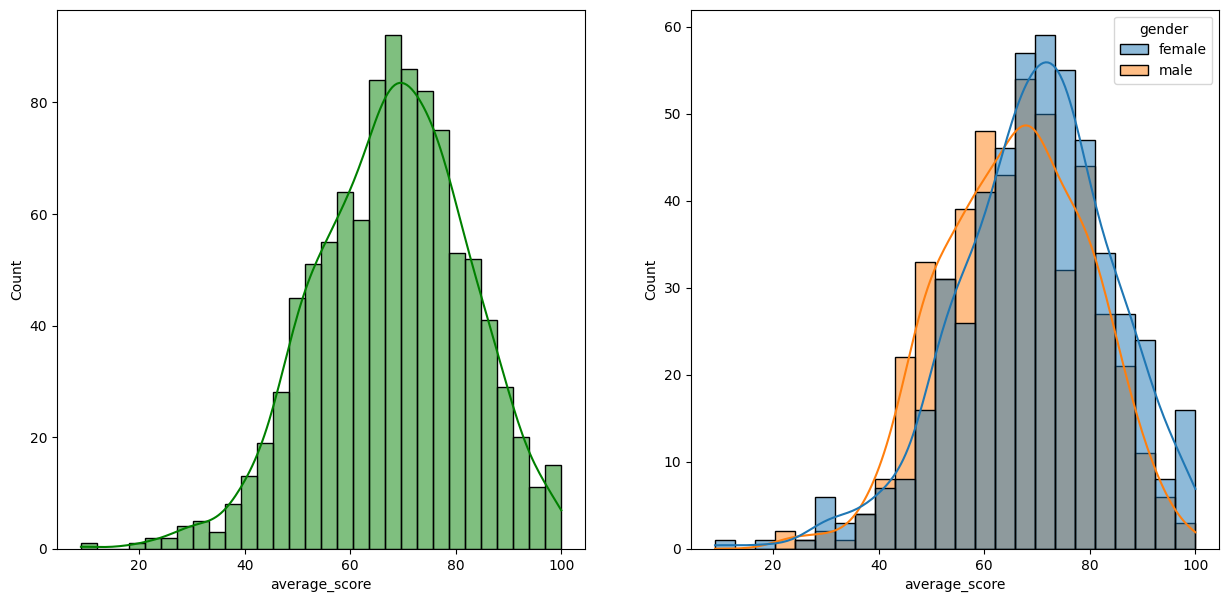

In [80]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='total_score', ylabel='Count'>

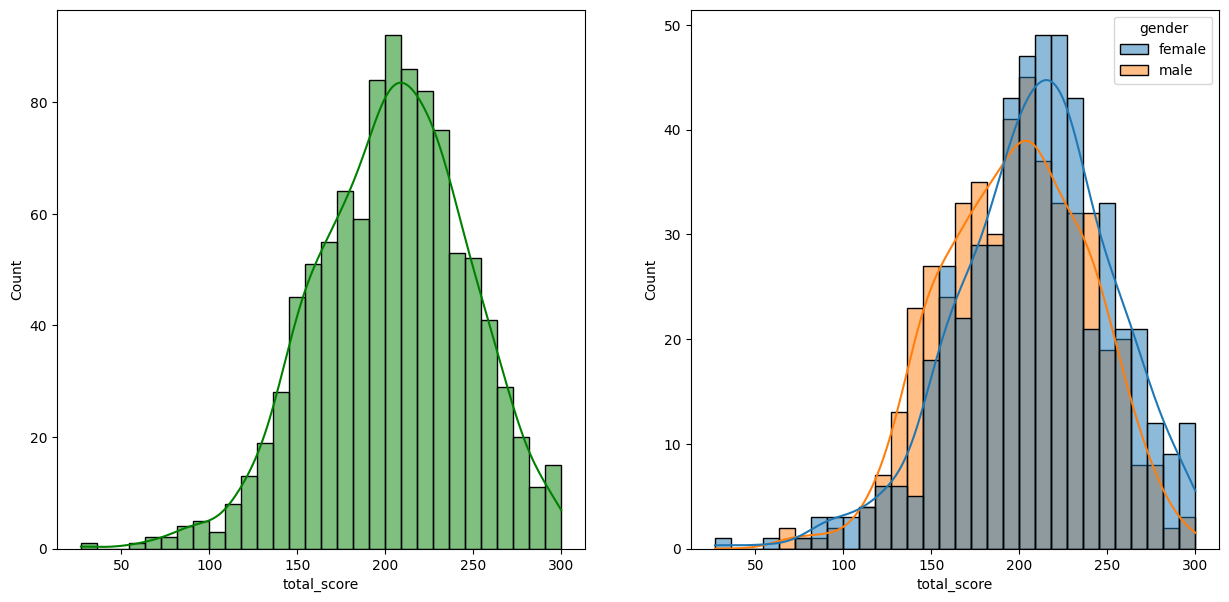

In [81]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, bins=30, x='total_score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, bins=30, x='total_score', kde=True, hue='gender')

##### Insights
- Female students performed better than their male counterparts

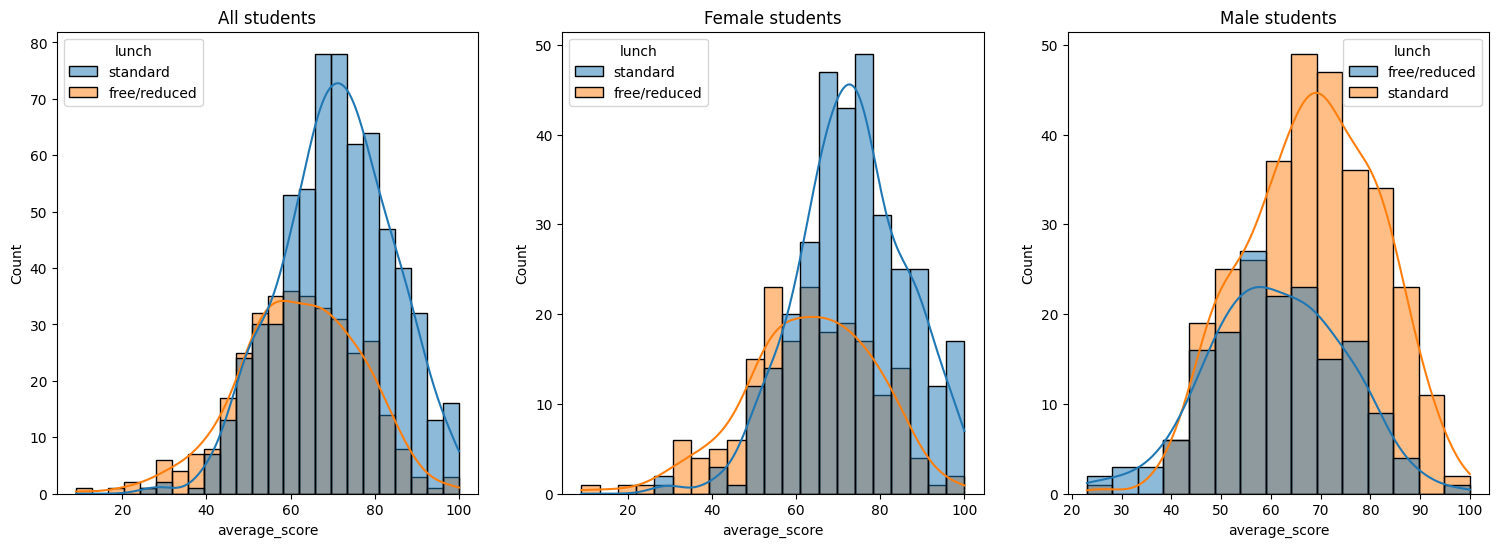

In [103]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title("All students")

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.title("Female students")

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.title("Male students")

plt.show()

##### Insights
- Standard lunches help in better performance irrespective of gender

Text(0.5, 1.0, 'Male students')

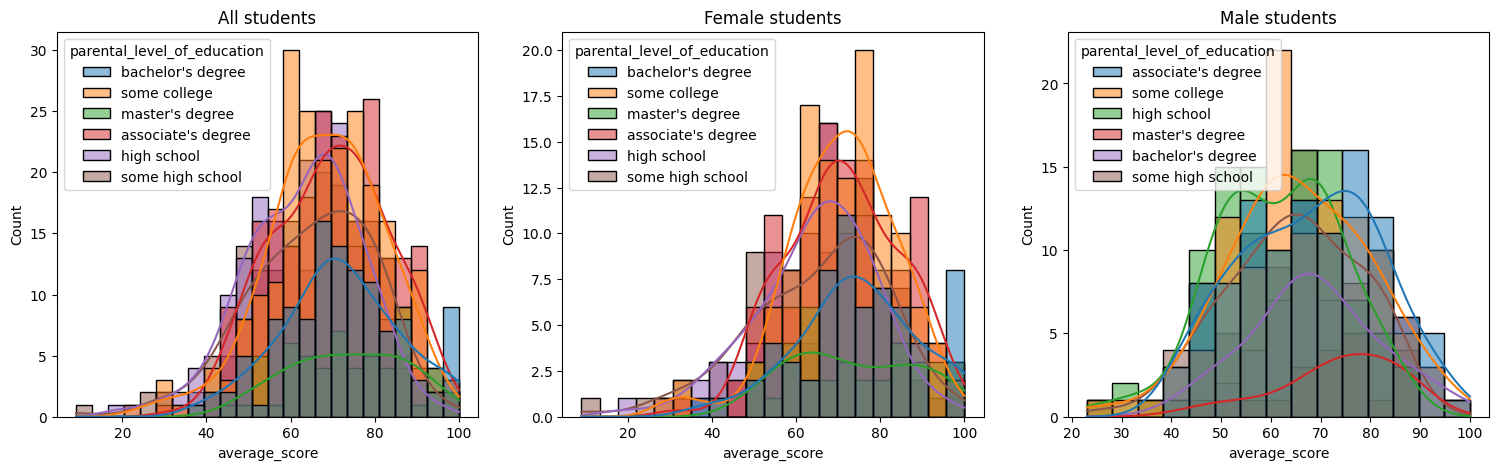

In [118]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.title('All students')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education' )
plt.title('Female students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education' )
plt.title('Male students')

##### Insights
- Generally speaking, parent's education has little to do with the performance of the student.

Text(0.5, 1.0, 'Male students')

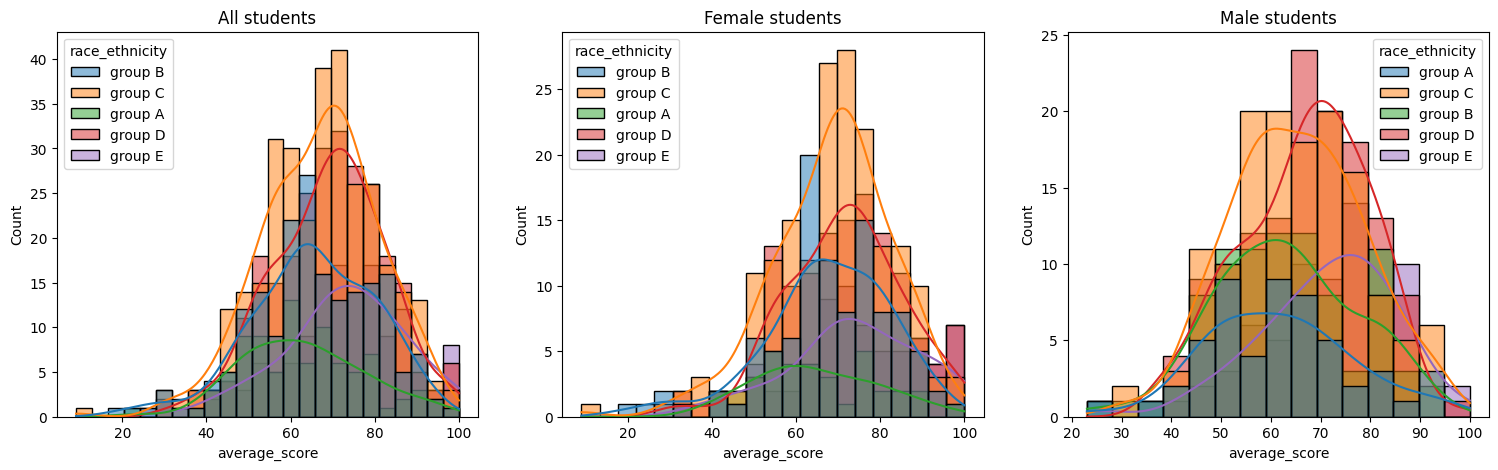

In [123]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.title('All students')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.title('Female students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.title('Male students')

##### Insights
- Generally, Group A and B do worse in the exam irrespective of gender
- In males, not only group A and b do poorly but so does group C


#### 4.2 Maximumum score of students in all three subjects